In [ ]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd
from datetime import datetime
Beijing = pd.read_csv('Beijing_PEK_2014.csv', skipinitialspace=True)

## Cleaning the data
First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [2]:
Beijing = Beijing.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

In [ ]:
remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [3]:
Beijing['WindDirDegrees'] = Beijing['WindDirDegrees'].str.rstrip('<br />')

and change the values in the 'WindDirDegrees' column to float64:

In [4]:
Beijing['WindDirDegrees'] = Beijing['WindDirDegrees'].astype('float64') 

We definitely need to change the values in the 'GMT' column into values of the datetime64 date type.

In [5]:
Beijing['Date'] = pd.to_datetime(Beijing['Date'])

In [6]:
Beijing['Date'] = pd.to_datetime(Beijing['Date'])
Beijing.dtypes

Date                          datetime64[ns]
Max TemperatureC                       int64
Mean TemperatureC                      int64
Min TemperatureC                       int64
Dew PointC                             int64
MeanDew PointC                         int64
Min DewpointC                          int64
Max Humidity                           int64
Mean Humidity                          int64
Min Humidity                           int64
Max Sea Level PressurehPa              int64
Mean Sea Level PressurehPa             int64
Min Sea Level PressurehPa              int64
Max VisibilityKm                       int64
Mean VisibilityKm                      int64
Min VisibilitykM                       int64
Max Wind SpeedKm/h                     int64
Mean Wind SpeedKm/h                    int64
Max Gust SpeedKm/h                   float64
Precipitationmm                      float64
CloudCover                           float64
Events                                object
WindDirDeg

We also need to change the index from the default to the datetime64 values in the 'GMT' column so that it is easier to pull out rows between particular dates and display more meaningful graphs:

In [7]:
Beijing.index = Beijing['Date']

## Finding a summer break

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. So as I'm in the northern hemisphere I'm going to create a dataframe that holds just those months using the `datetime` index, like this:

In [8]:
summer = Beijing.loc[datetime(2014,5,15) : datetime(2014,9,15)]
summer.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-15,2014-05-15,29,18,8,7,4,-2,76,37,9,...,23,10,8,26,8,47.0,0.0,NaN,NaN,92.0
2014-05-16,2014-05-16,30,22,14,9,4,-1,67,31,8,...,31,19,6,26,10,NaN,0.0,NaN,NaN,72.0
2014-05-17,2014-05-17,28,21,14,10,6,3,67,36,14,...,26,14,8,26,8,NaN,0.0,NaN,Rain,150.0
2014-05-18,2014-05-18,30,21,13,14,9,6,72,41,20,...,11,8,6,26,8,40.0,0.0,1.0,Rain,151.0
2014-05-19,2014-05-19,28,22,17,17,15,12,94,64,28,...,10,7,3,21,10,NaN,0.0,4.0,Rain-Thunderstorm,106.0


I now look for the days with warm temperatures.

In [9]:
summer[summer['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-22,2014-05-22,35,27,19,18,14,8,88,48,12,...,14,4,2,29,11,NaN,0.00,NaN,NaN,167.0
2014-05-23,2014-05-23,34,27,20,16,13,9,73,40,16,...,14,8,5,29,11,40.0,0.00,NaN,Rain,175.0
2014-05-28,2014-05-28,37,26,15,12,7,1,68,28,6,...,27,19,6,35,10,50.0,0.00,NaN,NaN,189.0
2014-05-29,2014-05-29,42,30,18,15,11,3,68,33,5,...,31,14,10,21,6,43.0,0.00,2.0,NaN,72.0
2014-05-30,2014-05-30,35,28,20,15,13,10,60,37,21,...,13,9,7,21,10,NaN,0.00,NaN,NaN,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-08-23,2014-08-23,33,27,22,23,21,16,94,69,40,...,10,5,2,26,6,32.0,0.51,5.0,Rain-Thunderstorm,155.0
2014-08-24,2014-08-24,33,27,22,20,16,9,88,56,18,...,31,14,6,21,10,29.0,0.25,1.0,Rain,39.0
2014-08-26,2014-08-26,36,26,16,15,10,3,83,41,7,...,31,19,6,14,6,21.0,0.00,NaN,NaN,28.0


Summer 2014 was hot: with most temperature above 25C. Best to see a graph of the temperature and look for the warmest period.

So next we tell Jupyter to display any graph created inside this notebook:

<AxesSubplot:xlabel='Date'>

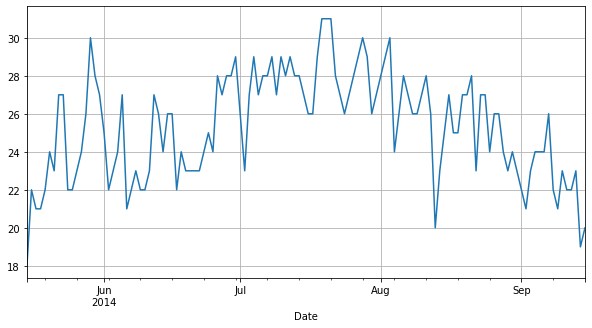

In [10]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

Now let's plot the 'Mean TemperatureC' for the summer:

<AxesSubplot:xlabel='Date'>

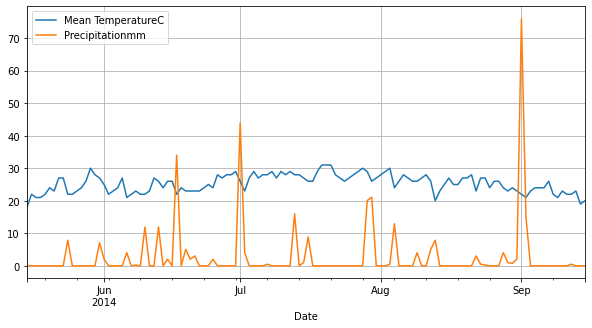

In [11]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Well looking at the graph middle of May looks good for a hoilday

<AxesSubplot:xlabel='Date'>

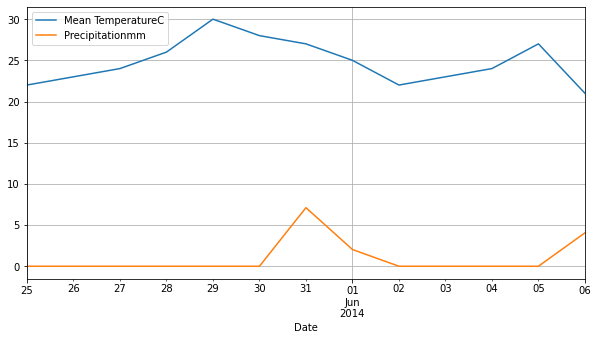

In [20]:
May = summer.loc[datetime(2014,5,25) : datetime(2014,6,6)]
May[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Yes, towards the end of May looks pretty good, just a day that have significant rain, the 25th to 30th

## Conclusions

The graphs have shown the volatility of the Beijing , but a couple of weeks were found when the weather wasn't too bad in 2014. Of course this is no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction we would need to analyse the summers for many more years. 